<a href="https://colab.research.google.com/github/gabriel-cm-saldanha/Analise-de-Imoveis/blob/main/Mini_Projeto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando as bibliotecas

In [ ]:
!pip install uszipcode
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from uszipcode import SearchEngine

/usr/local/lib/python3.8/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
df = pd.read_csv("/content/kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## 1 - Entendendo os tipos de variaveis que temos na base


In [ ]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
# Criando duas Listas com nomes das colunas, uma para colunas qualitativas e outra para colunas quantitativas

quali = []
quanti = []

for i in df.dtypes.index:
  if df.dtypes[i] == "object":
    quali.append(i)
  else:
    quanti.append(i)

In [ ]:
print('lista quali: ', quali)
print('Lista Quanti: ', quanti)


lista quali:  ['date']
Lista Quanti:  ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


## 2 - Detecção de Dados Nulos

In [ ]:
# para cada variavel no DF, iremos pegar a quantiadade de dados nulos

# iremos visualizar quantos nulos temos em cada variavel
# vamos criar uma tabela para visualizar

In [ ]:
#cria um dataframe com nome de todos as variaveis do dataframe "DF"

nulos = pd.DataFrame()
nulos['variavel'] = df.columns

In [ ]:
nulos

,variavel
0,id
1,date
2,price
3,bedrooms
4,bathrooms
5,sqft_living
6,sqft_lot
7,floors
8,waterfront
9,view


In [ ]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
df.drop_duplicates()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
#vamos colocar outra coluna contando a quantidade de variaveis nulas no DF

nulos['quantidade'] = pd.Series().astype('int64')
nulos['porcentagem'] = pd.Series().astype('int64')

for i in nulos.index:
    nulos.quantidade[i] = df[nulos['variavel'][i]].isna().sum()
    nulos.porcentagem[i] = (df[nulos['variavel'][i]].isna().sum()/df.id.count())*100

<ipython-input-14-b99071d0c929>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  nulos['quantidade'] = pd.Series().astype('int64')
<ipython-input-14-b99071d0c929>:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  nulos['porcentagem'] = pd.Series().astype('int64')
<ipython-input-14-b99071d0c929>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nulos.quantidade[i] = df[nulos['variavel'][i]].isna().sum()
<ipython-input-14-b99071d0c929>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: 

In [ ]:
df[nulos['variavel'][i]].isna().sum()

0

In [ ]:
nulos

,variavel,quantidade,porcentagem
0,id,0.0,0.0
1,date,0.0,0.0
2,price,0.0,0.0
3,bedrooms,0.0,0.0
4,bathrooms,0.0,0.0
5,sqft_living,0.0,0.0
6,sqft_lot,0.0,0.0
7,floors,0.0,0.0
8,waterfront,0.0,0.0
9,view,0.0,0.0


## 3 - Estatística Descritiva e Tabelas de Frequência

In [ ]:
# Criando um dataframe para variaveis quant para fazer analise estatistica descritiva
df_quanti = df[quanti]
df_quanti.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df_quanti['price_living_m2'] = df_quanti['sqft_living'] /df_quanti.price
df_quanti['price_lot_m2'] = df_quanti.sqft_lot / df_quanti.price
df_quanti['price_living15_m2'] = df_quanti.sqft_living15 / df_quanti.price
df_quanti['price_lot15_m2'] = df_quanti.sqft_lot15 / df_quanti.price

In [ ]:
df_quanti.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_living_m2,price_lot_m2,price_living15_m2,price_lot15_m2
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,...,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,0.004421,0.032548,0.004411,0.028577
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,...,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.001736,0.085657,0.001845,0.060004
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.001234,0.000493,0.000512,0.000950
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,0.003141,0.009294,0.003119,0.009349
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,0.004088,0.016885,0.004063,0.016592
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,...,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,0.005486,0.030000,0.005464,0.028770
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,0.011417,6.130495,0.025308,2.178000


In [ ]:
df_quanti.median()

id                   3.904930e+09
price                4.500000e+05
bedrooms             3.000000e+00
bathrooms            2.250000e+00
sqft_living          1.910000e+03
sqft_lot             7.618000e+03
floors               1.500000e+00
waterfront           0.000000e+00
view                 0.000000e+00
condition            3.000000e+00
grade                7.000000e+00
sqft_above           1.560000e+03
sqft_basement        0.000000e+00
yr_built             1.975000e+03
yr_renovated         0.000000e+00
zipcode              9.806500e+04
lat                  4.757180e+01
long                -1.222300e+02
sqft_living15        1.840000e+03
sqft_lot15           7.620000e+03
price_living_m2      4.087563e-03
price_lot_m2         1.688525e-02
price_living15_m2    4.062500e-03
price_lot15_m2       1.659196e-02
dtype: float64

In [ ]:
for i in df_quanti.columns:
  if i == 'zipcode':
    pass
  else:
    print('--------------------')
    print('Variável: ',i)
    print(df_quanti.groupby(i).zipcode.count())
    print('--------------------')

--------------------
Variável:  id
id
1000102       2
1200019       1
1200021       1
2800031       1
3600057       1
             ..
9842300095    1
9842300485    1
9842300540    1
9895000040    1
9900000190    1
Name: zipcode, Length: 21436, dtype: int64
--------------------
--------------------
Variável:  price
price
75000.0      1
78000.0      1
80000.0      1
81000.0      1
82000.0      1
            ..
5350000.0    1
5570000.0    1
6885000.0    1
7062500.0    1
7700000.0    1
Name: zipcode, Length: 4028, dtype: int64
--------------------
--------------------
Variável:  bedrooms
bedrooms
0       13
1      199
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
33       1
Name: zipcode, dtype: int64
--------------------
--------------------
Variável:  bathrooms
bathrooms
0.00      10
0.50       4
0.75      72
1.00    3852
1.25       9
1.50    1446
1.75    3048
2.00    1930
2.25    2047
2.50    5380
2.75    1185
3.00     753


## 4 - Detecção de Outliers

In [ ]:
def count_outliers(df):
    """
    Função para contar quantos outliers cada coluna tem em um dataframe.
    Usa a regra de 3 desvios padrão para detectar outliers.
    Retorna um dicionário com o número de outliers para cada coluna.
    """
    outlier_count = {}
    for col in df.columns:
        # Calcular a média e desvio padrão da coluna
        mean = df[col].mean()
        std = df[col].std()

        # Determinar os limites inferior e superior para considerar um valor um outlier
        lower_bound = mean - 3 * std
        upper_bound = mean + 3 * std

        # Contar o número de outliers na coluna
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outlier_count[col] = len(outliers)

    return outlier_count

In [ ]:
count_outliers(df_quanti)

{'id': 0,
 'price': 406,
 'bedrooms': 75,
 'bathrooms': 187,
 'sqft_living': 248,
 'sqft_lot': 347,
 'floors': 8,
 'waterfront': 163,
 'view': 829,
 'condition': 30,
 'grade': 136,
 'sqft_above': 254,
 'sqft_basement': 247,
 'yr_built': 0,
 'yr_renovated': 914,
 'zipcode': 0,
 'lat': 0,
 'long': 233,
 'sqft_living15': 237,
 'sqft_lot15': 363,
 'price_living_m2': 185,
 'price_lot_m2': 293,
 'price_living15_m2': 203,
 'price_lot15_m2': 322}

In [ ]:
# calculo dos Outliers

# Todos os pontos que estão fora do limite superior e inferior da amostra

# limite superior = Q3 + 1,5 * DistanciaInterQuartil
# limite inferior = Q1 - 1,5 * DistanciaInterQuartil

# Distancia InterQuartil = Valor do 3 Quartil - Valor do 1 Quartil (Q3 - Q1)

# Fazendo Este calculo para o dataframe (quantitativo)

colunas = df_quanti.columns
outliers  =[]

for i in df_quanti.columns:
  q3 = np.quantile(df_quanti[i], 0.75)
  q1 = np.quantile(df_quanti[i], 0.25)
  dist = q3 - q1
  lim_inf = q1 - 1.5*dist
  lim_sup = q3 + 1.5*dist
  df_sem_outliers = df_quanti[(df_quanti[i] >= lim_inf) & (df_quanti[i] <= lim_sup)]
  print(20*"-")
  print("variável", i)
  print("distancia", dist)
  print("lim_inf", lim_inf)
  print("lim_sup", lim_sup)
  print(20*"-")

  outlier = 0
  for j in df_quanti.index:
    if df_quanti[i][j] < lim_inf:
      outlier = outlier +1
    elif df_quanti[i][j] > lim_sup:
      outlier = outlier +1
    else:
      pass
  outliers.append(outlier)

df_outlier = pd.DataFrame()
df_outlier['variaveis'] = colunas
df_outlier['outliers'] = outliers
df_outlier['porcentagem'] = (outliers/df_quanti.id.count())*100

--------------------
variável id
distancia 5185851251.0
lim_inf -5655727682.5
lim_sup 15087677321.5
--------------------
--------------------
variável price
distancia 323050.0
lim_inf -162625.0
lim_sup 1129575.0
--------------------
--------------------
variável bedrooms
distancia 1.0
lim_inf 1.5
lim_sup 5.5
--------------------
--------------------
variável bathrooms
distancia 0.75
lim_inf 0.625
lim_sup 3.625
--------------------
--------------------
variável sqft_living
distancia 1123.0
lim_inf -257.5
lim_sup 4234.5
--------------------
--------------------
variável sqft_lot
distancia 5648.0
lim_inf -3432.0
lim_sup 19160.0
--------------------
--------------------
variável floors
distancia 1.0
lim_inf -0.5
lim_sup 3.5
--------------------
--------------------
variável waterfront
distancia 0.0
lim_inf 0.0
lim_sup 0.0
--------------------
--------------------
variável view
distancia 0.0
lim_inf 0.0
lim_sup 0.0
--------------------
--------------------
variável condition
distancia 1.0
l

## 5 - Descubrindo a localização de cada imovel

In [ ]:
from geopy.geocoders import Nominatim

def get_cities(zipcodes):
    """
    Função para obter as cidades correspondentes a uma lista de zipcodes usando a API do OpenStreetMap.
    Retorna um dicionário com os zipcodes como chave e as cidades correspondentes como valor.
    """
    geolocator = Nominatim(user_agent='my-application')  # Criar objeto geolocator

    cities = {}
    for zipcode in zipcodes:
        location = geolocator.geocode({'postalcode': zipcode, 'country': 'USA'}, addressdetails=True)  # Fazer a pesquisa do zipcode
        if location is not None:  # Verificar se o resultado é válido
            city = location.raw['address'].get('city', None)  # Obter o nome da cidade
            if city is not None:
                cities[zipcode] = city

    return cities

In [ ]:
lista_zip=df_quanti['zipcode'].unique()
get_cities(lista_zip)

{98125: 'Seattle',
 98136: 'Seattle',
 98007: 'Bellevue',
 98115: 'Seattle',
 98107: 'Seattle',
 98126: 'Seattle',
 98103: 'Seattle',
 98133: 'Seattle',
 98119: 'Seattle',
 98112: 'Seattle',
 98117: 'Seattle',
 98105: 'Seattle',
 98008: 'Bellevue',
 98122: 'Seattle',
 98144: 'Seattle',
 98004: 'Bellevue',
 98005: 'Bellevue',
 98116: 'Seattle',
 98118: 'Seattle',
 98199: 'Seattle',
 98102: 'Seattle',
 98108: 'Seattle',
 98177: 'Seattle',
 98006: 'Bellevue',
 98109: 'Seattle',
 98106: 'Seattle'}

In [ ]:
search = SearchEngine()

def get_bairro(codigo_postal):
    zipcode = search.by_zipcode(codigo_postal)
    bairro = zipcode.major_city
    return bairro

df_sem_outliers['bairro'] = df_sem_outliers['zipcode'].apply(get_bairro)
df_sem_outliers


Download /root/.uszipcode/simple_db.sqlite from https://github.com/MacHu-GWU/uszipcode-project/releases/download/1.0.1.db/simple_db.sqlite ...
  1.00 MB downloaded ...
  2.00 MB downloaded ...
  3.00 MB downloaded ...
  4.00 MB downloaded ...
  5.00 MB downloaded ...
  6.00 MB downloaded ...
  7.00 MB downloaded ...
  8.00 MB downloaded ...
  9.00 MB downloaded ...
  10.00 MB downloaded ...
  11.00 MB downloaded ...
  Complete!


<ipython-input-30-2f17acfa1a8f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sem_outliers['bairro'] = df_sem_outliers['zipcode'].apply(get_bairro)


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,price_living_m2,price_lot_m2,price_living15_m2,price_lot15_m2,bairro
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,98178,47.5112,-122.257,1340,5650,0.005318,0.025462,0.006039,0.025462,Seattle
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,98125,47.7210,-122.319,1690,7639,0.004777,0.013461,0.003141,0.014199,Seattle
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,98028,47.7379,-122.233,2720,8062,0.004278,0.055556,0.015111,0.044789,Kenmore
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,98136,47.5208,-122.393,1360,5000,0.003245,0.008278,0.002252,0.008278,Seattle
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,98074,47.6168,-122.045,1800,7503,0.003294,0.015843,0.003529,0.014712,Sammamish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,98103,47.6993,-122.346,1530,1509,0.004250,0.003142,0.004250,0.004192,Seattle
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,98146,47.5107,-122.362,1830,7200,0.005775,0.014533,0.004575,0.018000,Seattle
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,98144,47.5944,-122.299,1020,2007,0.002537,0.003357,0.002537,0.004991,Seattle
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,98027,47.5345,-122.069,1410,1287,0.004000,0.005970,0.003525,0.003217,Issaquah


## 6 - Visualização de Dados

In [ ]:
cities = df_sem_outliers['bairro'].value_counts().to_frame()
cities = cities.sort_values(by='bairro', ascending=False)
cities = cities.reset_index()
cities = cities.rename(columns={'index': 'bairro', 'bairro':'qtd'})
cities

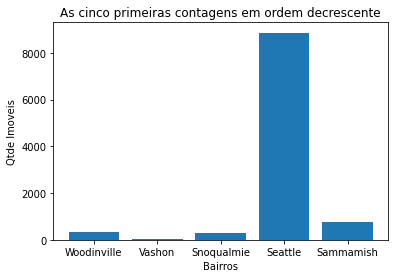

In [ ]:
# ordenar o DataFrame pela coluna 'Bairro' em ordem decrescente e selecionar as cinco primeiras linhas
df_ordenado = cities.sort_values('bairro', ascending=False).iloc[:5]

# criar o gráfico de barras
plt.bar(df_ordenado['bairro'], df_ordenado['qtd'])

# adicionar rótulos aos eixos x e y e um título
plt.xlabel('Bairros')
plt.ylabel('Qtde Imoveis')
plt.title('As cinco primeiras contagens em ordem decrescente')

# exibir o gráfico
plt.show()

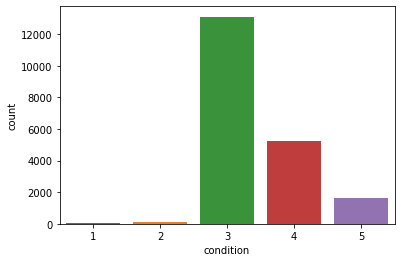

In [ ]:
sns.countplot(x='condition',data=df_sem_outliers);

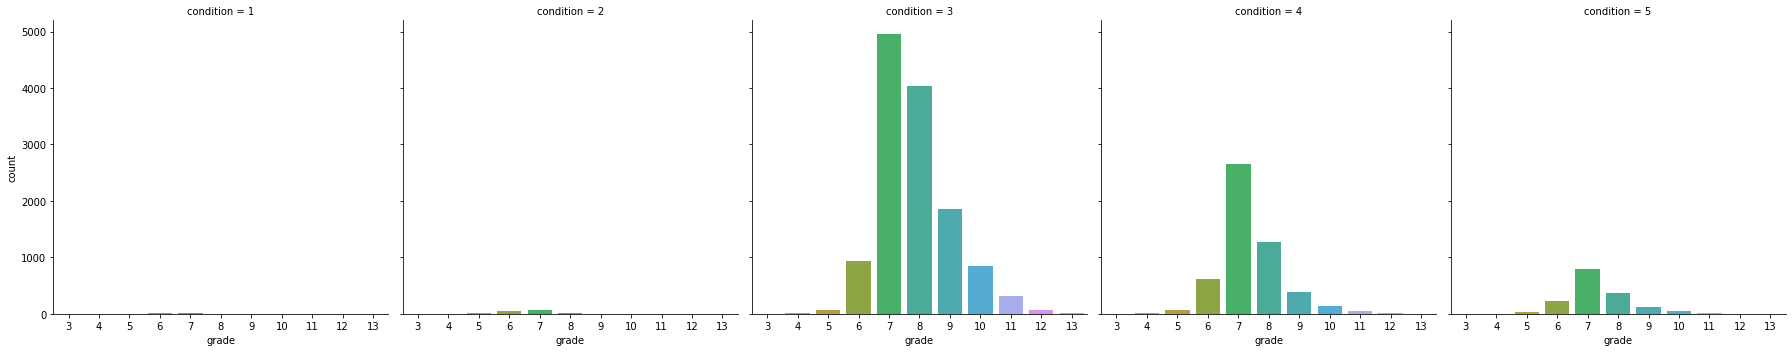

In [ ]:
# Aqui definimos que vamos trabalhar com imoveis na condição 3 por ter uma amostragem maior
sns.catplot(x='grade', col='condition', kind='count',data=df_sem_outliers);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


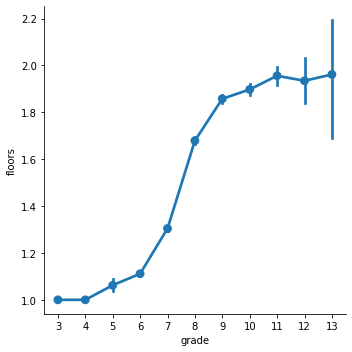

In [ ]:
# grafico analisando Nota do Imovel e as condicoes do imovel 
sns.catplot('grade','floors', kind='point',data=df_sem_outliers);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


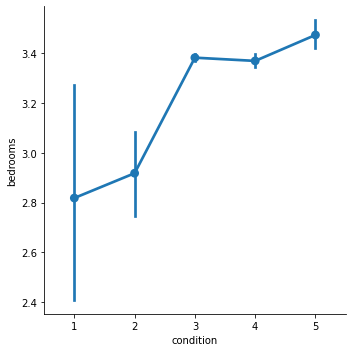

In [ ]:
# grafico analisando Nota do Imovel e as condicoes do imovel 
sns.catplot('condition','bedrooms', kind='point',data=df_sem_outliers);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


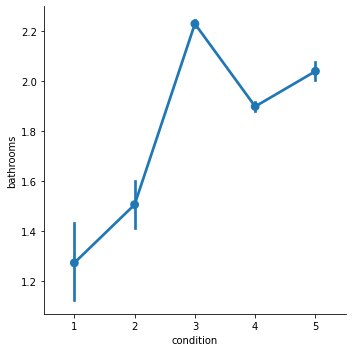

In [ ]:
# grafico analisando Nota do Imovel e a qtde banheiros 
sns.catplot('condition','bathrooms', kind='point',data=df_sem_outliers);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


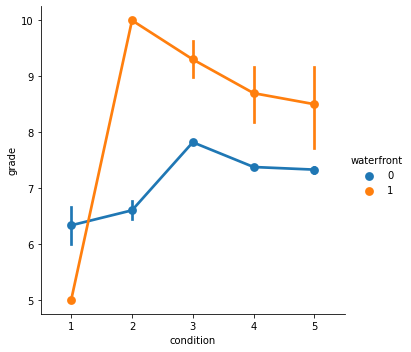

In [ ]:
# grafico analisando a relação de Classificação dos Imoveis e condições, separado por visão de praia 
sns.catplot('condition','grade',hue='waterfront', kind='point',data=df_sem_outliers);

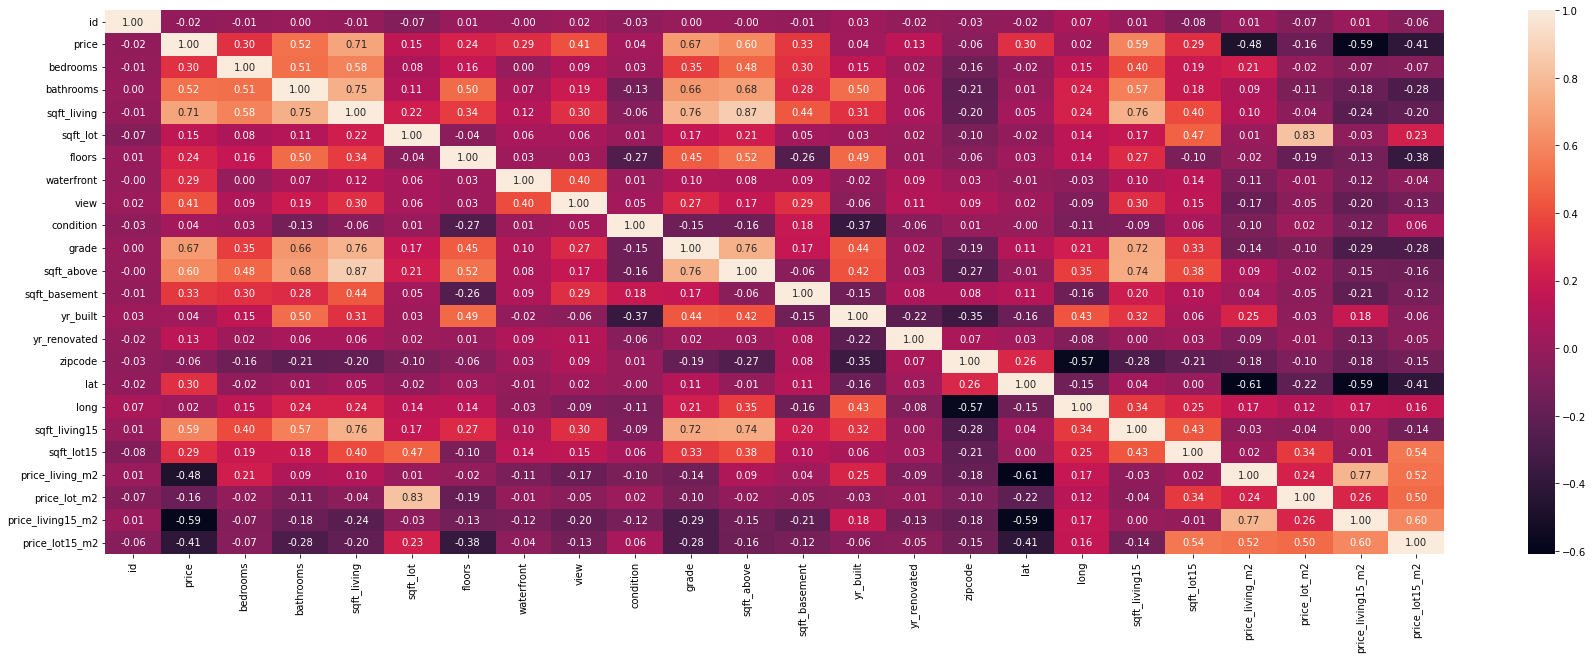

In [ ]:
plt.figure(figsize=(30,10))
sns.heatmap(df_sem_outliers.corr(), annot=True, fmt='.2f');

## Analise


In [ ]:
df = df_sem_outliers[(df_sem_outliers['bedrooms'] >= 3) & (df_sem_outliers['bedrooms'] <= 4) & (df_sem_outliers['condition'] >= 3)]
df = df[(df['floors'] == 2) & (df['waterfront'] == 0) & (df['view'] >= 1)]
df = df[(df['bathrooms'] >= 2) & (df['bathrooms'] <= 3)]
df = df[(df['price'] <= 600000) & (df['yr_built'] >= 2010)]
df = df.drop(columns=['lat','long'])
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price_living_m2,price_lot_m2,price_living15_m2,price_lot15_m2,bairro
13965,8141310180,277500.0,3,2.5,2620,4558,2.0,0,3,3,...,2010,0,98022,1670,4558,0.009441,0.016425,0.006018,0.016425,Enumclaw
15487,8125200480,422000.0,4,2.5,2310,6650,2.0,0,2,3,...,2012,0,98166,1800,9819,0.005474,0.015758,0.004265,0.023268,Seattle
20204,1622049242,550000.0,4,2.5,3148,9612,2.0,0,3,3,...,2014,0,98198,3000,11475,0.005724,0.017476,0.005455,0.020864,Seattle
21554,2855000110,388000.0,3,2.5,2198,6222,2.0,0,2,3,...,2010,0,98198,2198,7621,0.005665,0.016036,0.005665,0.019642,Seattle
21598,8956200760,541800.0,4,2.5,3118,7866,2.0,0,2,3,...,2014,0,98001,2673,6500,0.005755,0.014518,0.004934,0.011997,Auburn
